In [2]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np

threadcnts = [32,64,256,1024,2048,4096,8192,16384]
lg_fptf_s = [0,2,3,4,5,6,7,8,9]

In [5]:
datasets = []
for lg_fptf in lg_fptf_s:
    dataset = []
    for threadcnt in threadcnts:
        p = subprocess.run(["../build/xorSync/xorSync.exe", str(lg_fptf), str(threadcnt)], capture_output=True)
        print(p.stderr.decode('utf-8'))
        res = p.stdout.decode('utf-8')[:-1].split(",")
        dataset.append((float(res[0]), float(res[1])))
    datasets.append(dataset)

with open("datasets.txt", 'w') as f:
    f.write(str(datasets))
    f.write("\n")

# max fibers per thread: 31
# threads: 32

# max fibers per thread: 31
# threads: 64

# max fibers per thread: 31
# threads: 256

# max fibers per thread: 31
# threads: 1024

# max fibers per thread: 31
# threads: 2048

# max fibers per thread: 31
# threads: 4096

# max fibers per thread: 31
# threads: 8192

# max fibers per thread: 31
# threads: 16384

# max fibers per thread: 124
# threads: 32

# max fibers per thread: 124
# threads: 64

# max fibers per thread: 124
# threads: 256

# max fibers per thread: 124
# threads: 1024

# max fibers per thread: 124
# threads: 2048

# max fibers per thread: 124
# threads: 4096

# max fibers per thread: 124
# threads: 8192

# max fibers per thread: 124
# threads: 16384

# max fibers per thread: 248
# threads: 32

# max fibers per thread: 248
# threads: 64

# max fibers per thread: 248
# threads: 256

# max fibers per thread: 248
# threads: 1024

# max fibers per thread: 248
# threads: 2048

# max fibers per thread: 248
# threads: 4096

# max fib

In [8]:
import math
def sync_rate_plot(graph, normalize=False):
    idx = ["nosync", "sync"].index(graph)

    fig, ax_f = plt.subplots()

    # automatically update ylim of ax2 when ylim of ax1 changes.
    for i, dataset in enumerate(datasets):
        fpt_max = (31 << lg_fptf_s[i])
        f = (lambda x: dataset[0][idx]/x[idx]) if normalize else (lambda x: 1000 * (31<<16)/x[idx]) # total work is always 31 << 16
        ax_f.plot(np.array(threadcnts)/32, list(map(f, dataset)), label=f"FPT MAX: {fpt_max}")
    ax_f.set_xlabel("Block Count (#threads=32)")
    ax_f.set_title(graph)

    ax_f.set_ylabel("Rate (normalized)" if normalize else "Rate (fibers/sec)")

    fig.legend()
    fig.savefig(f"tsync_{graph}_{"norm" if normalize else "raw"}.png")

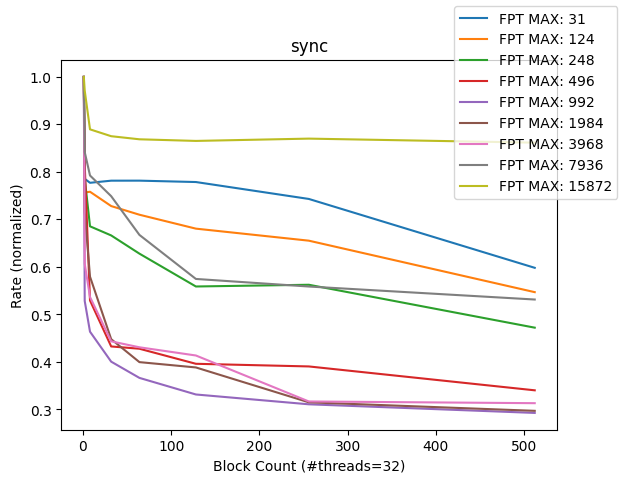

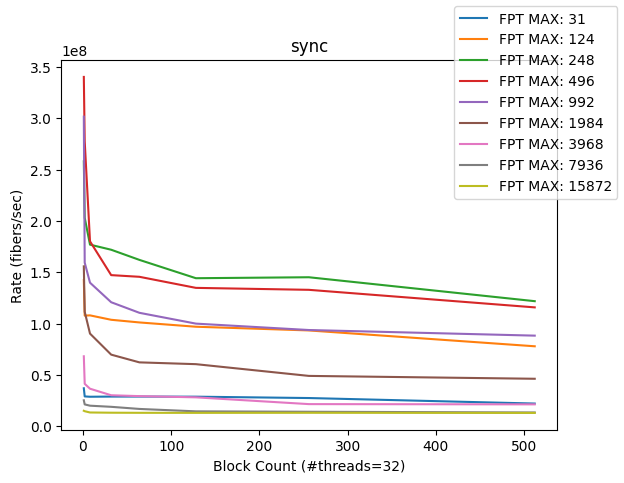

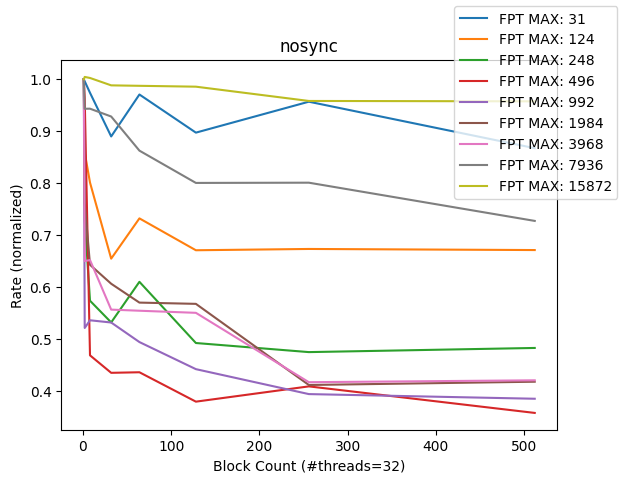

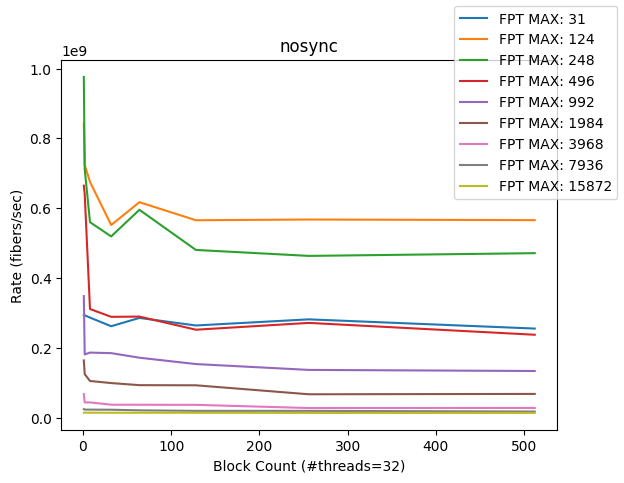

In [9]:
sync_rate_plot("sync", normalize=True)
sync_rate_plot("sync", normalize=False)
sync_rate_plot("nosync", normalize=True)
sync_rate_plot("nosync", normalize=False)

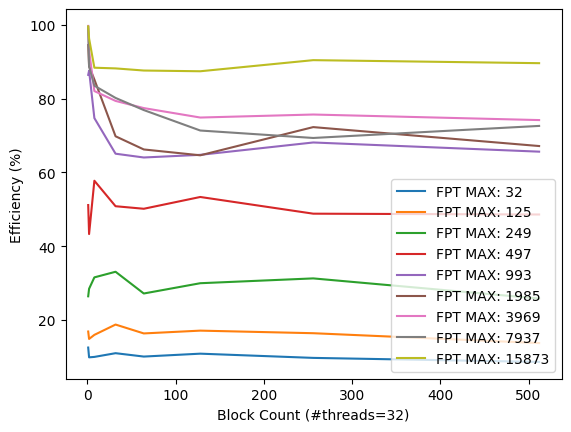

In [10]:
for i, dataset in enumerate(datasets):
    fpt_max = (31 * (1 << lg_fptf_s[i])) + 1
    plt.plot(np.array(threadcnts)/32, list(map(lambda x: x[0]/x[1] * 100, dataset)), label=f"FPT MAX: {fpt_max}")
plt.xlabel("Block Count (#threads=32)")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.savefig("efficiency.png")
plt.show()